# Projekt Zaliczeniowy Modelowanie w Naukach o Ziemi

Projekt jest na ocenę. Rezultatem ma być kompletne sprawozdanie. Sprawozdania w formacie pdf przesyłamy w terminie do ostatniego dnia semestru.

Dane do projektu: `plik daily_ice_edge.csv`.

### Krok 0

1. Po przemyśleniu układu danych narysować kontur przedstawiający minimalny zasięg lodu w analizowanym okresie dla wszystkich kątów. 

  a. Przemyśleć układ danych
  
  b. Narysować kontur przedstawiający minimalny zasięg lodu w analizowanym okresie dla wszystkich kątów

Warto zapoznać się z kształtem Antarktydy.   

### Krok 1
  
1. Dla wszystkich kątów (dla każdego z osobna) znaleźć model matematyczny zasięgu lodu w funkcji czasu. 

  a. Zbudować model matematyczny dla każdej kolumny w oparciu o funkcji trygonometryczne (sinusoidalna cykliczność; można o to zapytać).

Uwaga na próbkowanie w czasie oraz na fakt, że czasami lodu morskiego dla danego kąta może nie być. 

### Krok 2
  
1. Stworzyć animację przedstawiającą zmianę w czasie zarówno rzeczywistego jak i wymodelowane.

### Krok 3
 
1. Zaproponować i *w miarę możliwości* obliczyć model zasięgu lodu biorący pod uwagę wszystkie dane na raz (`f(Lat, Lon, t)`).

  a. Przekonać, że świta nam w głowie jakaś idea.

## Wskazówki 

Można zbudować model bazując na sinusach i cosinusach dla każdego kierunku z osobna. Po powtórzeniu dla wszystkich azymutów pojawi się macierz, którą animujemy.

Po narysowaniu minimalnego zasięgu lodu w układzie biegunowym otrzymamy minimalny zasięg lodu przypominający kształt Antarktydy. Uzyskujemy to poprzez znalezienie minimalnej wartości w każdej kolumnie i narysowanie tego w układzie biegunowym.


In [1]:
# install.packages("ggplot2") # nolint: commented_code_linter.
# install.packages("gganimate") # nolint: commented_code_linter.

library(ggplot2)
library(gganimate)

## Dane do projektu

Plik `daily_ice_edge.csv` zawiera informację o zasięgu lodu morskiego wokół Antarktydy dla wszystkich długości geograficznych - w formacie długość-szerokość - na przestrzeni wielu lat. Dane są zapisane w formie macierzy, gdzie wiersze odpowiadają szerokości geograficznej, a kolumny długości geograficznej.

In [2]:
daily_ice_edge <- read.csv(
  "./data/daily_ice_edge.csv"
)

daily_open_water <- read.csv(
  "./data/daily_open_water.csv"
)


In [ ]:
View(daily_ice_edge) # nolint: commented_code_linter.
# View(daily_open_water) # nolint: commented_code_linter.

## Minimalny zasięg lodu na Antarktydzie

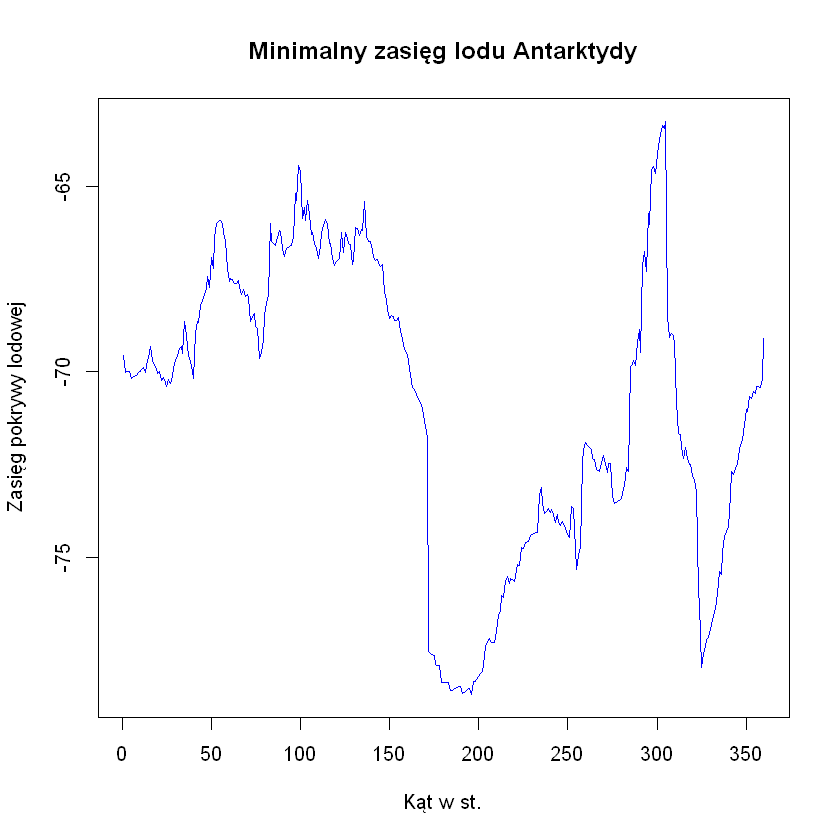

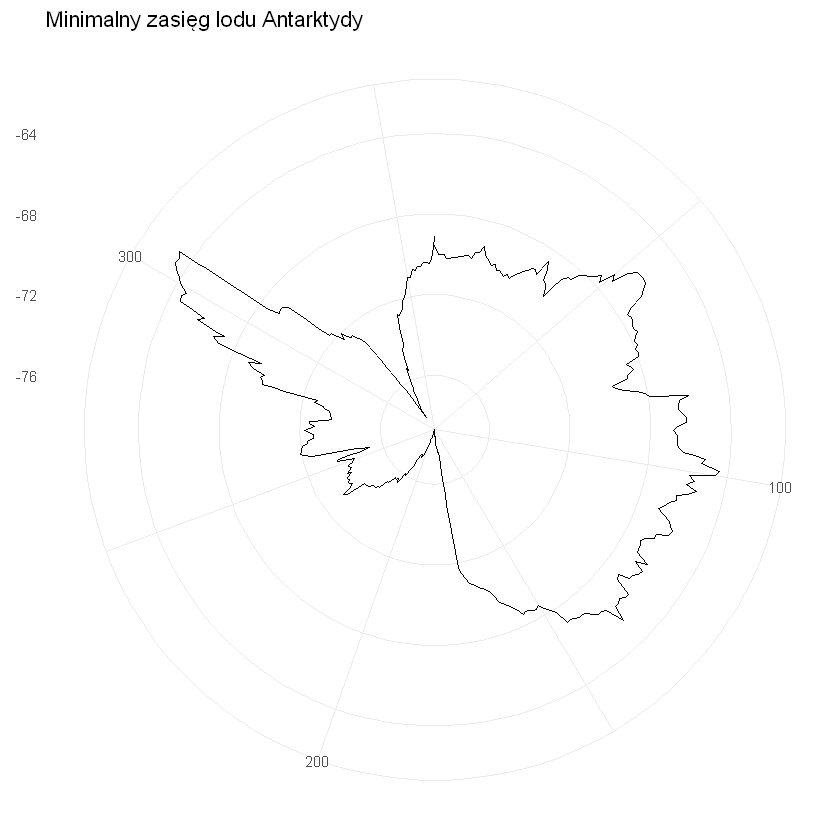

In [4]:
ice_edge_colnum <- length(colnames(daily_ice_edge))

ice_edge_min <- c()
open_water_min <- c()

for (i in 2:(ice_edge_colnum - 1)) {
  ice_edge_min[i - 1] <- min(daily_ice_edge[, i], na.rm = TRUE)
}
ice_edge_min <- as.data.frame(ice_edge_min)

plot(
  x = seq_along(t(ice_edge_min)), y = t(ice_edge_min), type = "l",
  col = "blue", xlab = "Kąt w st.", ylab = "Zasięg pokrywy lodowej",
  main = "Minimalny zasięg lodu Antarktydy"
)

ggplot(
  data = ice_edge_min, aes(x = seq_along(ice_edge_min), y = ice_edge_min)
) +
  geom_line() +
  ggtitle("Minimalny zasięg lodu Antarktydy") +
  coord_polar() +
  theme_minimal() +
  theme(axis.title = element_blank())


In [11]:
sequence <- seq(from = 1, to = nrow(daily_ice_edge), by = 1000)
i <- 1000

for (i in sequence) {  
  day1 <- t(daily_ice_edge[i, ])

  start_index <- 2
  end_index <- 361

  angles <- c()
  for (j in seq(start_index, end_index, 1)) angles[j] <- day1[j]

  angles <- as.data.frame(angles)
  values <- as.numeric(angles[2:361, ])
  angles <- as.numeric(seq(start_index, end_index, 1))

  df <- data.frame(angles, values)
  ggplot(data = df, aes(x = angles, y = values)) +
    geom_line() +
    xlim(2, 361) +
    coord_polar()
}

In [6]:

# Tworzenie wykresu
p <- ggplot(data = df, aes(x = angles, y = values)) +
  geom_line() +
  xlim(2, 361) +
  coord_polar()

# Dodanie animacji
animation <- p + transition_reveal(angles)

# Renderowanie animacji
animate(animation, fps = 10, duration = 5, end_pause = 10)

# Zapisanie animacji do pliku
anim_save("ice_edge_animation.gif")

<img src="data:image/gif;base64,R0lGODlh4AHgAfZYAAAAADoAAAAAOjoAOjMzM2YAAGYAOmZmAAAAZjoAZmYAZgBmZjpmZk1N
TW5NTU1NbpA6AJA6OrZmAJA6ZoZNTY5NTaBqTatuTZCQOtuQOo6OTbmGTbmGasiOTciObtOg
atu2ZuSrbv+2ZgA6kDo6kABmtk1NjmpNhk1qoE1uq4ZNhqBqhqtujoZqoE2GuTqQ202OyG6O
yGqg02a2226r5Ga2/6uOjsiOjtOghuSrjuu5hrb/ttvbkP/Ijv/bkOvToNv/tv/kq+vruf//
to6OyI6r5Ia567m5647I/5Db/6DT67nr66vk/7b//9v/2///yOvr0///29Pr68j//9v//+vr
6///5OT//////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAACH/C05FVFNDQVBFMi4wAwEAAAAh+QQECgAAACH/C0ltYWdl
TWFnaWNrDmdhbW1hPTAuNDU0NTQ1ACwAAAAA4AHgAQAH/4BYgoOEhYaHiImKi4yNjo+QkZKT
lJWWl5iZmpucnZ6foKGio6SlpqeoqaqrrK2ur7CxsrO0tba3uLm6u7y9vr/AwcLDxMXGx8jJ
ysvMzc7P0NHS09TV1tfY2drb3M9V3+Dh4uPk5ebn6Onq6+zt7u/w8fLz9PX29/j5+t+r+/7/
AAMKHEiwoMGDCNH1S8iwocOHECNKnDhvIcWLGDNq3MiRo8WOIEOKHEmyJLmPJlOqXMmyZT6U
LmPKnElTJcyaOHPq3InwJs+fQIMKZedzqNGjSHUWTcq0qdORS59KnUrVYdSqWLNqfalqq9ev
YOldDUu27NexZtOqfYp2rdu3Qf/bwp1Ld6bcunjzlryrt6/fjHz/Ch7cMDDhw4gDGk4MlRFj
nosfQ3ScjrJkk5EvK05EUJFmjZk/2zPksZDoyV1PHzS9krXqgqFfKxzEryYh2ZtT4dZ3WxyW
nb1334uNO3i53z+NC4dHXLTyc8iFPl9eOTX12YKYM51+3bf17t6jxxO/nTb48KjOgzNfjzzb
7Oqb+2WPz71U+N3l46XP2yv/4t+99t8+9mE1oHMBImhQgVrhp5p+ajnYWYQMMgZhWRLC5taB
iF0IVoarwQXiYR5uNWKIc534V4kGVogiXSrqxeJUMfYko4t1zehUjQnhSCFhOibFY2Er+rhW
kEYNadX/YEpimCCMIhn5lpRkIQlUkw9RuaGW/j254V4W7udlWlhKxOWWMI5Z5ZlmSlYmVVba
1hKbIk65iRUXNPAAEyE04CcNrpFJ50SD2nnkJk8QYcgNUwSKoUyF1imoJkE40EAKVwjSA6CC
EOCpoDRJ+UlTbwq5yaZYBFGEIIyS9qicJ7nK2yFDRRoXJh1cmikWqAYRA61hldoRcrIy5ChO
tia3SQhI8NosqsWamNOxFFHrkrC3aoJnAzAIwiyw/tnVW7KwWZsSuciquSO6xh7I7mocNmai
utuxxF0477ab74IN0nsUtlY1uW9h8ZbWom5VDQxQwccBB7CxCft7K0n3qqOw/5kPv/gewmw1
luzF1WbcGcggxQlalO+SHDJUG6dHqsoV7QvzyiGJfK7E09as8MwX2axYeRz/WzLIPGPk8z9F
R2RymwZPeF/S7UAdcNDSNc0vjUe/9C/OkG6UtcVZfT1aklxfC5jYYPd7snRl22u01OudBXfD
2bp8Zc9zx/1h3r7VfUpcNFe7Zs9Xto2Z4ICZxbfeDlONLKGLjxP50IgrZTjLTHt9ZOXpOm4X
xiWjmbltl4euNOabjy6u52ajRrGIfE8+WumaT3Z4iqpfS3vitt+eYt6yx8y6Ta6fmxfwq9vd
+pJu/wNArXMHz9zuhPbe/D7PC51lTEsTmKX07pALwP/449e7/ZzUWw9x1/Zk/zSR4K/TfX3n
s0+P+3D2CGn6psI6D/4J01j8qjO8mhEpZ0wimnsGCB3+6W99CATSz+iGmTvlCVPb6pa5hnVA
pSRGZgq5mSa+xSxUdaBZFavdA4ETpv5UpoKauIEGdJUDJvCKU54igO/gdTfsUCJ/9JPfXjZx
wht6wIbQYhjhVtjDKiBCLOAi29iiRjFcXcoGjdpUDW+4Qd5pDDJd5EoKQyWWdzAQX8t6FhJM
iEIlVs9GYIQP8Nx4PTOOx2OZ2BYG86TBMb7xi6HK0OToaLzwDeqMTnTgBAGpuxNJz487fGF7
dFbAP15tf0YaICSjJMThDK3/krkTCCIJGD552c8c6GLg/IgCR/TdsYqAc6HXFOk9RlbxkCKc
EyqRVhpQMu+SN5uiTUZ5kmIubJa+7KDTghnE1hCzb/gSJTKVt0QNwbCW6HtmbRK5TLwls5Xd
RNkxxVVBW37vm8AcyDPRts1AwjKdGEOnNcM5LJJpU35nJJY5CSZPde4zcP50mEeiCc9zUlN9
ATXdP3XnRcbRc2oHrV9CrbZQ7kWuQDC7KC0rUlCj/bKJEpVcR3u00Vc+FG8hTQ5CjXnSnpRU
Oy21pDJjSdK0xXRBLy3lPNd2OilW1KHSRE0//aGy+LFTp9q7KUuDatC/rZSXKpRprZS6VKby
M6Lg/xwnTzm3tUXakaq5weo+oGCBBrigCmQ1KxbSelatorShQoKqPIraVFMURAcyqAIHlIDX
KmwACX3dgBHkWs2txlWWc90pSYcqDyisYAk4UEIVeiCDyFahr9gsrGH750lhWtWljIWHEChw
1r1OlgYekCxmtQbXzZovZqz9LLxCGw+8RhYLtrXhapvJ1ah2LLGI9epsxaqPDwwWrzqggV+N
0NcTBldpo7ynW6lIVLASKKfiSCsKpACFPJ2Vrdz0bCg5GECkVneiOKUtcHc5yd4a0EDUFe55
QUvc6caKo+59L3xtKt/5pre+/p2NSXtayLBJ0rrr/a9Tf7oeLV20jvuloP9iA6xO7FaVKJnM
7+vmJbmkXYxnJjskjhYnXWiGC6gMTnCFtXXBK2QwWrKFqYRTSrwPtXOmmV1xJki4RkAdMYyx
heKFcdyawT31uQvbhAx1JQgrsKBRWMjhSMdDntiRMVaOKNx4eStKIj4LUE+oQB8JWcbr3vij
Fo0iAWFMPCv3F2lWTAEWuagpTpFZxbOSqjOdCGddnpnIQQ4rJr7VAyQQ2s5HRXGej3zL6Ozs
zghF3puvy2Jd6XFXkP7qOBPNXhHap6iZxumQs5pjOKu3k27ltImHGEKX+nbVECRskk99YFnz
Y2br5BHUQk1hWMe61ES1MJ8nzWliYgluqm61sgH/zeVg03rZwPY1ks92pjnSeMZMjLYYAVxm
+96312/DL3R/Xetsa3s4Fv4whs897m6DbsrYJnWgKc1tPE+7gc0GqLj1bWtUk/ves3t2vOeN
z/a6dt/8rg8u0Qzw9mB3Z+6WsUcbfu2IS9zcBFe4wEU66XVfHHLg1jPC7Q1vi2u83h+neMHj
q9mMJzzlJEewpum9YHabHLb+FnlnFRrzAWN85zS3a8iBrvByt7vjGuZvvifscihunKD9LvrA
CcZ00FTb21UX78lr3nSDY/3BJW85tFUeda2j++l/7rrUFc3ssr+601iXOcu3LnSy+7zLbP85
0g+ORrkv3ewOR/uwhz7r/6S7faBwR2+K5352lLMy7hXecoz1K+29Q/7mwnN8zu3uQmRLrcQL
/LffNx94zStd7YRNNtTbTrm0Z33yXm8812PP+XmrXtJuQzbrR+5004/977AvtuRRx/DRn773
s8c87V8f3sMvPtyMtvzdkV93oqPe5q4HvOh1lv2wY3/6c1XkwHbt8esz37fR2/7yw7/x8av/
OOSS3T0/HX3n99yM4rc/4VEZqe

# A tibble: 50 × 7
   format width height colorspace matte filesize density
   <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
 1 gif      480    480 sRGB       FALSE        0 72x72  
 2 gif      480    480 sRGB       TRUE         0 72x72  
 3 gif      480    480 sRGB       TRUE         0 72x72  
 4 gif      480    480 sRGB       TRUE         0 72x72  
 5 gif      480    480 sRGB       TRUE         0 72x72  
 6 gif      480    480 sRGB       TRUE         0 72x72  
 7 gif      480    480 sRGB       TRUE         0 72x72  
 8 gif      480    480 sRGB       TRUE         0 72x72  
 9 gif      480    480 sRGB       TRUE         0 72x72  
10 gif      480    480 sRGB       TRUE         0 72x72  
# ℹ 40 more rows